In [12]:
%matplotlib inline


from IPython.display import Image,display

from numpy import pi

from qutip import *
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload 
from scipy.optimize import fsolve
import LocalOperator as LO
reload(LO)
sx = sigmax()
sy = sigmay()
sz = sigmaz()
ID = qeye(2)

def plot_operator(operator, vmin='not set', vmax='not set'):
    if vmin == 'not set':
            vmin = np.amin(np.real(operator.data.toarray()))
    if vmax == 'not set':
        vmax = np.amax(np.real(operator.data.toarray()))
    
    data = operator.data.toarray()
    data = np.ma.masked_where(abs(data) < 0.00000001 , data)
    cmap = plt.cm.nipy_spectral
    cmap.set_bad(color='whitesmoke')
    plt.imshow(np.real(data),
               interpolation='nearest', vmin=vmin, vmax=vmax,cmap=cmap)
    
def plot_commutations(op1, op2, figsize=(15, 5)):
    com = op1*op2-op2*op1
    vmin = min(np.amin(np.real(op1.data.toarray())),
            np.amin(np.real(op2.data.toarray())),
            np.amin(np.real(com.data.toarray())))
    vmax = max(np.amax(np.real(op1.data.toarray())),
            np.amax(np.real(op2.data.toarray())),
            np.amax(np.real(com.data.toarray())))
    fig = plt.figure(figsize=figsize)
    fig.suptitle("Real part only")
    op1_plt = fig.add_subplot(1, 3, 1)
    op1_plt.set_title("First Op")
    plot_operator(op1, vmin=vmin, vmax=vmax)
    op2_plt = fig.add_subplot(1, 3, 2)
    op2_plt.set_title("Second Op")
    plot_operator(op2, vmin=vmin, vmax=vmax)
    com_plt = fig.add_subplot(1, 3, 3)
    com_plt.set_title("Commutation relation")
    plot_operator(op1*op2-op2*op1, vmin=vmin, vmax=vmax)

now lets add some interaction!, we take the operators to be :
$$H1 = \sigma_z^1\sigma_z^2 \\
H2 = \sigma_x^2\sigma_x^3 \\$$

In [3]:
H1 = LO.LocalOperator({1:sz, 2:sz})
H2 = LO.LocalOperator({2:sx, 3:sx})

In [4]:
np.set_printoptions(threshold=np.inf)
n = 5
C1 = ( LO.LocalOperator({2:sz}).force_d(n) + 
      LO.LocalOperator({2:sx, 4: sx ,5: sx }) )
L1 = LO.LocalOperator({1:sz}).full_form(n) + C1

In [5]:
C2 =(LO.LocalOperator( {2:sz,4:sx,5:sx} ).force_d(n) +
     LO.LocalOperator( {2:sx} ) )
L2 = LO.LocalOperator( {3:sx} ).full_form(n) + C2

Plotting real part of matrix 


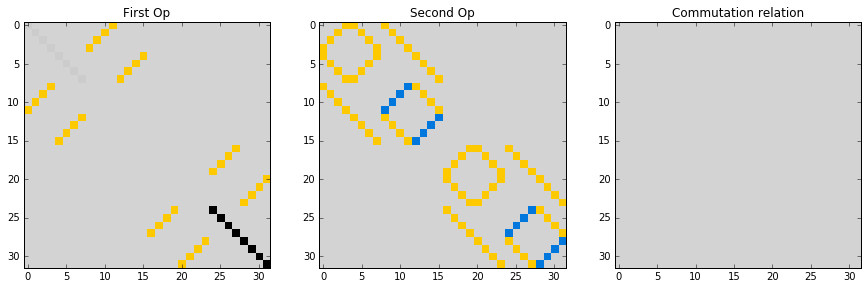

In [6]:
plot_commutations(L1,L2)

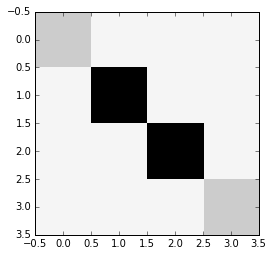

In [14]:
plot_operator(H1.full_form(2))

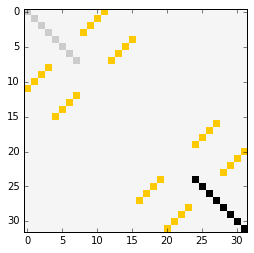

In [15]:
plot_operator(L1)

In [ ]:
H1